In [46]:
import pandas as pd

In [26]:
df = pd.read_csv("datasets/Training.csv")

In [29]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [30]:
 df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [31]:
len(df['prognosis'].unique())

41

In [32]:
#train

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [34]:
x = df.drop("prognosis", axis=1)
y = df['prognosis']

In [35]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x, Y, test_size=0.3, random_state=20)

# Training models


In [37]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

#store model
models = {
    "SVC":SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100,random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100,random_state=42),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB()
}
for model_name, model in models.items():
    print(model_name, ":", model)
    model.fit(x_train, y_train)

    #test
    prediction = model.predict(x_test)

    accuracy = accuracy_score(y_test, prediction)

    cm = confusion_matrix(y_test, prediction)

    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} confusion Matrix:")
    print(np.array2string(cm, separator=','))
    

SVC : SVC(kernel='linear')
SVC accuracy : 1.0
SVC confusion Matrix:
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 [ 0, 0, 0,..., 0,41, 0],
 [ 0, 0, 0,..., 0, 0,31]]
RandomForest : RandomForestClassifier(random_state=42)
RandomForest accuracy : 1.0
RandomForest confusion Matrix:
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 [ 0, 0, 0,..., 0,41, 0],
 [ 0, 0, 0,..., 0, 0,31]]
GradientBoosting : GradientBoostingClassifier(random_state=42)
GradientBoosting accuracy : 1.0
GradientBoosting confusion Matrix:
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 [ 0, 0, 0,..., 0,41, 0],
 [ 0, 0, 0,..., 0, 0,31]]
KNeighbors : KNeighborsClassifier()
KNeighbors accuracy : 1.0
KNeighbors confusion Matrix:
[[40, 0, 0,..., 0, 0, 0],
 [ 0,43, 0,..., 0, 0, 0],
 [ 0, 0,28,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,34, 0, 0],
 

Prediction


In [38]:
svc = SVC(kernel ='linear')
svc.fit(x_train,y_train)
ypred = svc.predict(x_test)
accuracy_score(y_test,ypred)

1.0

In [39]:
import pickle
pickle.dump(svc,open("models/svc.pkl",'wb'))

In [40]:
svc = pickle.load(open("models/svc.pkl", 'rb'))

In [41]:
#test 1
print("predicted label:", svc.predict(x_test.iloc[0].values.reshape(1,-1)))
print("Actual label:", y_test[0])

predicted label: [40]
Actual label: 40


C:\Users\rafiu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
#test 2
print("predicted label:", svc.predict(x_test.iloc[10].values.reshape(1,-1)))
print("Actual label:", y_test[10])

predicted label: [20]
Actual label: 20


C:\Users\rafiu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Load Database

In [43]:
sym_des = pd.read_csv('datasets/symtoms_df.csv')
precautions = pd.read_csv('datasets/precautions_df.csv')
workout = pd.read_csv('datasets/workout_df.csv')
description = pd.read_csv('datasets/description.csv')
medications = pd.read_csv('datasets/medications.csv')
diets = pd.read_csv('datasets/diets.csv')

In [44]:
sym_des

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN
...,...,...,...,...,...,...
4915,4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements
4916,4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring
4917,4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting


In [45]:


symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]
    

In [21]:
def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    diet = diets[diets['Disease'] == dis]['Diet']
    diet = [d for d in diet.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,diet,wrkout

In [22]:
#test
symptoms = input("Enter your symptoms:")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]

predicted_disease = get_predicted_value(user_symptoms)
desc,pre,med,diet,wrkout = helper(predicted_disease)


print("*******************Predicted Disease***************")
print(predicted_disease)
print("*******************Description*****************") 
print(desc)
print("******************Precaution********************")
i = 1
for p in pre[0]:
    print(i, ": ", p)
    i+=1
print("******************Medications********************")
i = 1
for m in med:
    print(i, ": ", m)
    i+=1

print("***************Suggested Workout*****************")
i = 1
for w in wrkout:
    print(i, ": ", w)
    i+=1

print("******************Diets********************")
i = 1
for d in diet:
    print(i, ": ", d)
    i+=1

Enter your symptoms: itching


*******************Predicted Disease***************
Fungal infection
*******************Description*****************
Fungal infection is a common skin condition caused by fungi.
******************Precaution********************
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
******************Medications********************
1 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
***************Suggested Workout*****************
1 :  Avoid sugary foods
2 :  Consume probiotics
3 :  Increase intake of garlic
4 :  Include yogurt in diet
5 :  Limit processed foods
6 :  Stay hydrated
7 :  Consume green tea
8 :  Eat foods rich in zinc
9 :  Include turmeric in diet
10 :  Eat fruits and vegetables
******************Diets********************
1 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


C:\Users\rafiu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [23]:
import sklearn
print(sklearn.__version__)


1.6.1


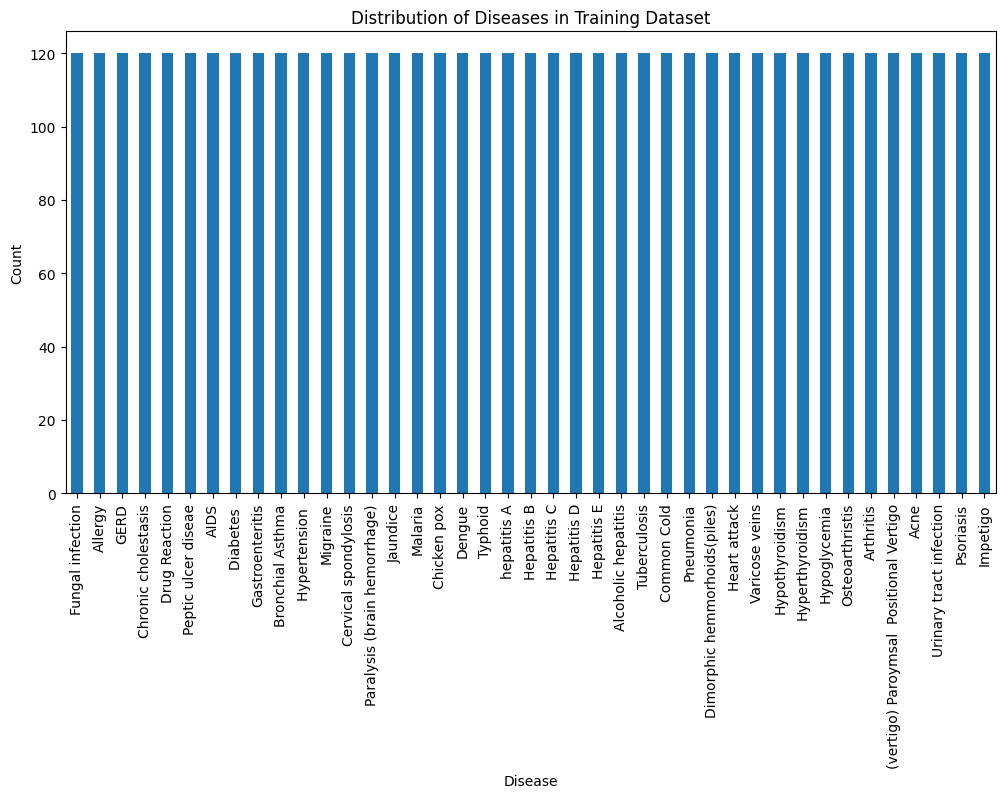

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df['prognosis'].value_counts().plot(kind='bar')
plt.title("Distribution of Diseases in Training Dataset")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


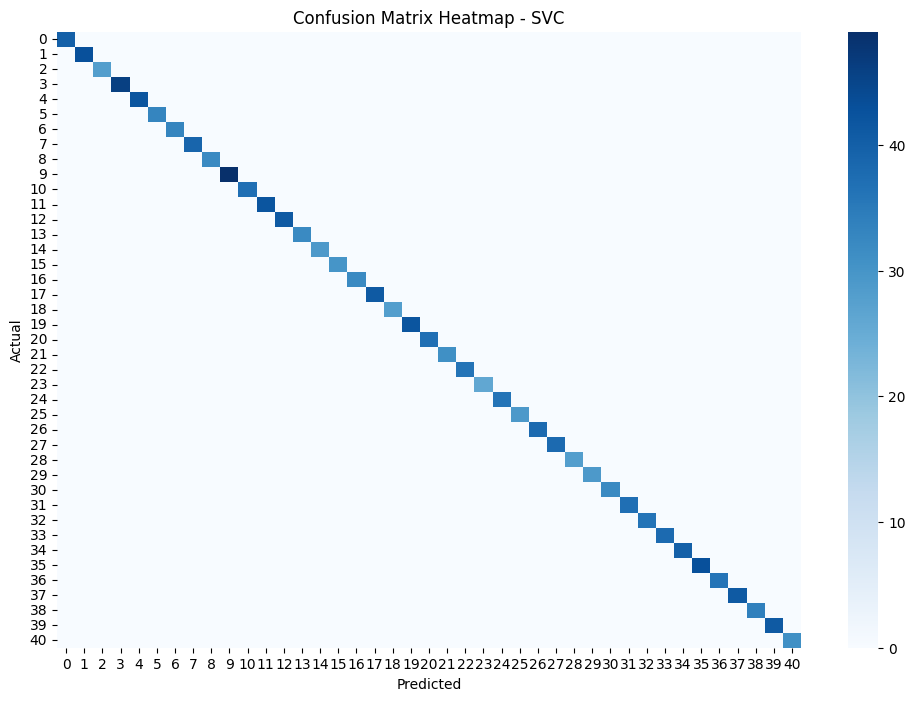

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, cmap="Blues", annot=False, cbar=True)
plt.title("Confusion Matrix Heatmap - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


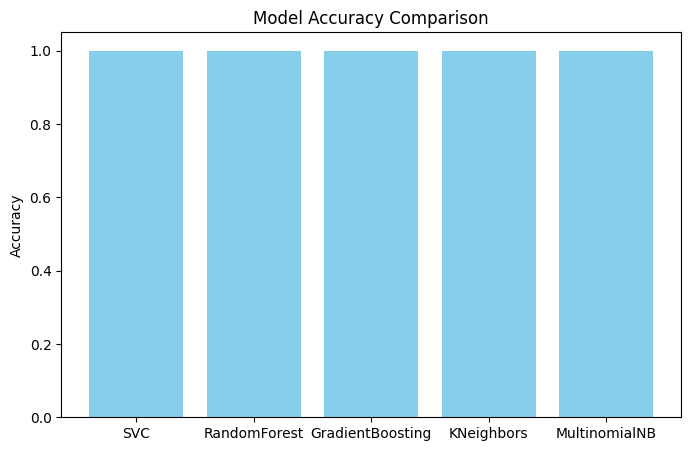

In [48]:
accuracies = {}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


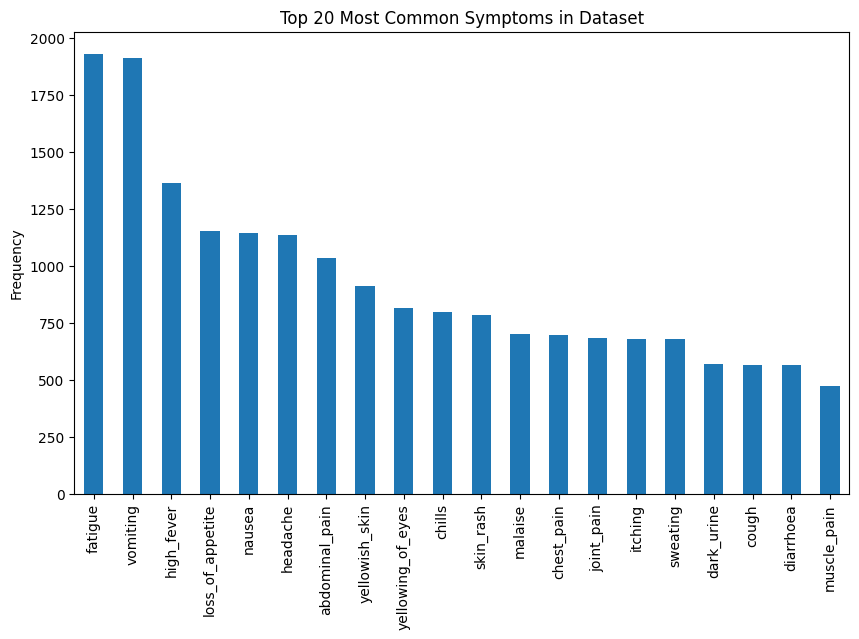

In [50]:
symptom_counts = df.drop("prognosis", axis=1).sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(10,6))
symptom_counts.plot(kind='bar')
plt.title("Top 20 Most Common Symptoms in Dataset")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


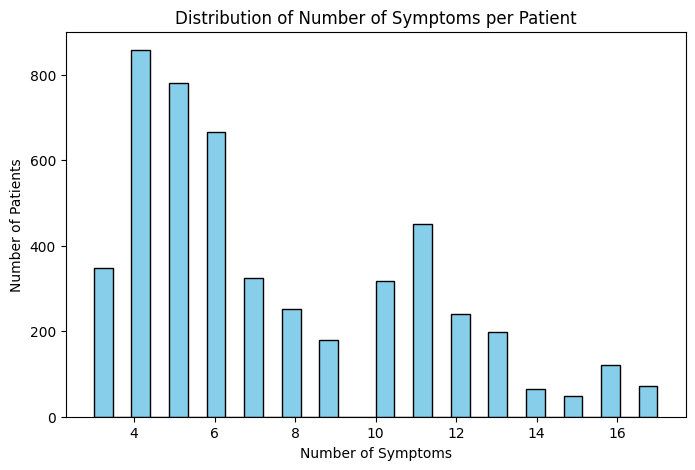

In [51]:
import matplotlib.pyplot as plt

symptom_counts_per_row = df.drop("prognosis", axis=1).sum(axis=1)

plt.figure(figsize=(8,5))
plt.hist(symptom_counts_per_row, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Symptoms per Patient")
plt.xlabel("Number of Symptoms")
plt.ylabel("Number of Patients")
plt.show()


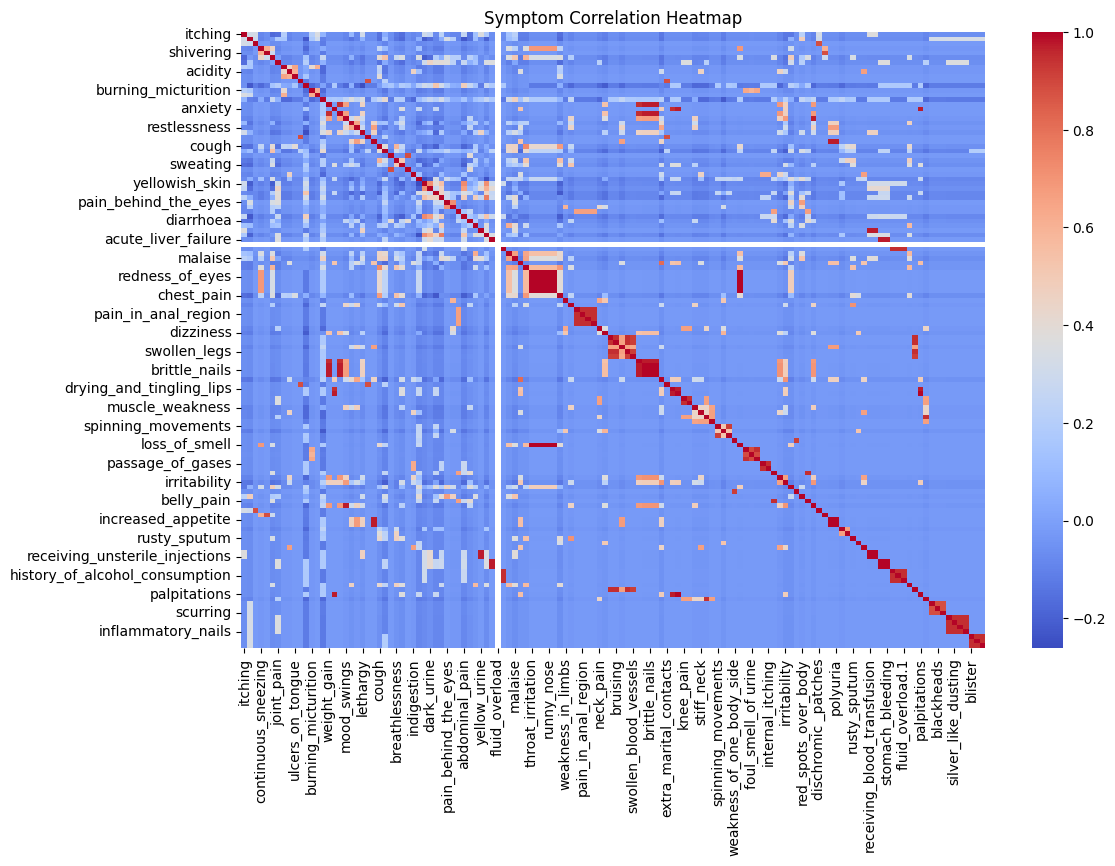

In [52]:
import seaborn as sns

corr = df.drop("prognosis", axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", cbar=True)
plt.title("Symptom Correlation Heatmap")
plt.show()


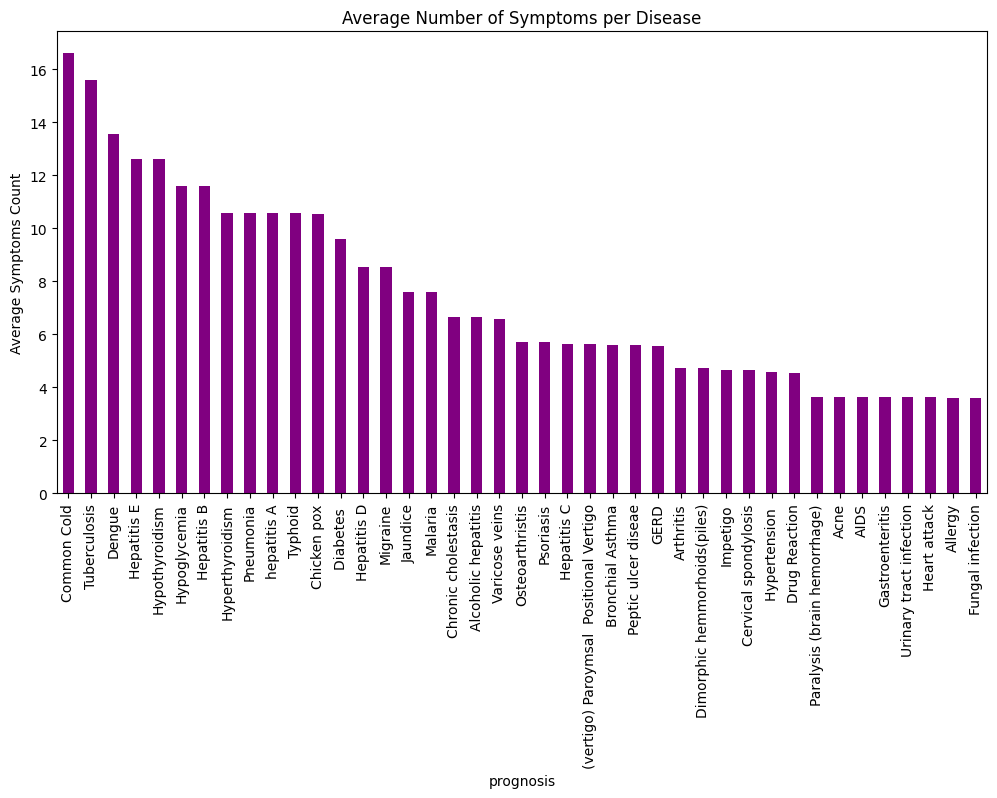

In [53]:
avg_symptoms = df.drop("prognosis", axis=1).sum(axis=1).groupby(df['prognosis']).mean()

plt.figure(figsize=(12,6))
avg_symptoms.sort_values(ascending=False).plot(kind="bar", color="purple")
plt.title("Average Number of Symptoms per Disease")
plt.ylabel("Average Symptoms Count")
plt.xticks(rotation=90)
plt.show()
